In [43]:
##PREDICCIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("inputs/data_predict.csv", header=0, delimiter=';')

/var/folders/jy/x2pqrfp13zq3nj0tq7p5wp400000gn/T/ipykernel_7998/3244851366.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("inputs/data_predict.csv", header=0, delimiter=';')


In [45]:
##formateo columnas objects que son numerics o date
df["ApplicationDate"] = pd.to_datetime(df["ApplicationDate"], format='mixed')
df["MonthlyIncome"] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')
df["TotalDebtToIncomeRatio"] = pd.to_numeric(df['TotalDebtToIncomeRatio'], errors='coerce')
df["Gender"] = df["Gender"].replace({"F":0, "M":1})

/var/folders/jy/x2pqrfp13zq3nj0tq7p5wp400000gn/T/ipykernel_7998/1081767790.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"F":0, "M":1})


In [46]:
df = df.drop(columns=["MonthlyIncome","LoanApproved"])


In [47]:
df = df.drop(["Gender","EmploymentStatus", "EducationLevel","ApplicationDate","MaritalStatus","HomeOwnershipStatus","MonthlyDebtPayments","LoanPurpose","RiskScore"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20002 non-null  int64  
 1   AnnualIncome                20002 non-null  int64  
 2   CreditScore                 20002 non-null  int64  
 3   Experience                  20002 non-null  int64  
 4   LoanAmount                  20002 non-null  int64  
 5   LoanDuration                20002 non-null  int64  
 6   WithChilds                  20002 non-null  int64  
 7   NumberOfDependents          20002 non-null  int64  
 8   CreditCardUtilizationRate   20002 non-null  float64
 9   NumberOfOpenCreditLines     20002 non-null  int64  
 10  NumberOfCreditInquiries     20002 non-null  int64  
 11  DebtToIncomeRatio           20002 non-null  float64
 12  BankruptcyHistory           20002 non-null  int64  
 13  PreviousLoanDefaults        200

In [48]:
orden = ["TotalDebtToIncomeRatio","AnnualIncome","BankruptcyHistory","LoanDuration","PreviousLoanDefaults"]

In [49]:
df = df[orden]

In [50]:
import joblib

In [51]:
modelo_xgboost = joblib.load("inputs/models/xgboos_bestmodel.joblib")

In [52]:
prediction = modelo_xgboost.predict(df)

In [53]:
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [54]:
df.loc[:,'predicciones'] = prediction

In [55]:
df

,TotalDebtToIncomeRatio,AnnualIncome,BankruptcyHistory,LoanDuration,PreviousLoanDefaults,predicciones
0,0.181077,39948,0,48,0,0
1,0.389852,39709,0,48,0,0
2,0.462157,40724,0,36,0,0
3,0.313098,69084,0,96,0,0
4,0.070210,103264,0,36,0,1
...,...,...,...,...,...,...
19997,0.357227,48958,0,72,0,0
19998,0.408678,41025,0,72,0,0
19999,0.298006,53227,0,48,0,0
20000,0.408678,65429,0,24,0,0


COMPARO LA PREDICCION CONTRA LOS DATOS UTILIZADOS POR ANALISTAS DE LA ENTIDAD FINANCIERA

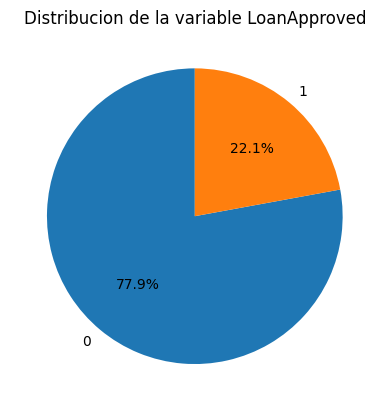

In [56]:
count_LoanApprove = df["predicciones"].value_counts()

plt.Figure()
plt.gcf().set_facecolor('white')
plt.pie(count_LoanApprove, labels=count_LoanApprove.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribucion de la variable LoanApproved")
plt.show()